In [1]:
!pip install post-analysis-clustering

In [2]:
from post_analysis_clustering.plot_profile import prep_dist, prep_frequency_feature, plot_feature_distributions

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()

# Create DataFrame with features and target
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target

# Optional: map numeric species to string labels
df_iris['species_name'] = df_iris['species'].map(dict(zip(range(3), iris.target_names)))

# Show the first few rows
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


In [4]:
df_iris = df_iris.reset_index(names='id')

In [5]:
df_iris.drop(columns=['id','species','species_name'],axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
all_df, segment_dfs = prep_dist(raw_df=df_iris, 
                features = df_iris.drop(columns=['id','species','species_name'],axis=1).columns.to_list() , 
                primary_key= 'id', 
                target_cluster = 'species')
df_dict_all = {'all segment': all_df}
df_dict_0 = {'segment 0' : segment_dfs[0]}
df_dict_1 =  {'segment 1' : segment_dfs[1]}
df_dict_2 =  {'segment 2' : segment_dfs[2]}

Processing segment 0
Processing segment 1
Processing segment 2
Execution time for prep_dist: 0.0098 seconds


Execution time for prep_frequency_feature: 0.0037 seconds
Execution time for prep_frequency_feature: 0.0027 seconds
Execution time for prep_frequency_feature: 0.0027 seconds
Execution time for prep_frequency_feature: 0.0036 seconds


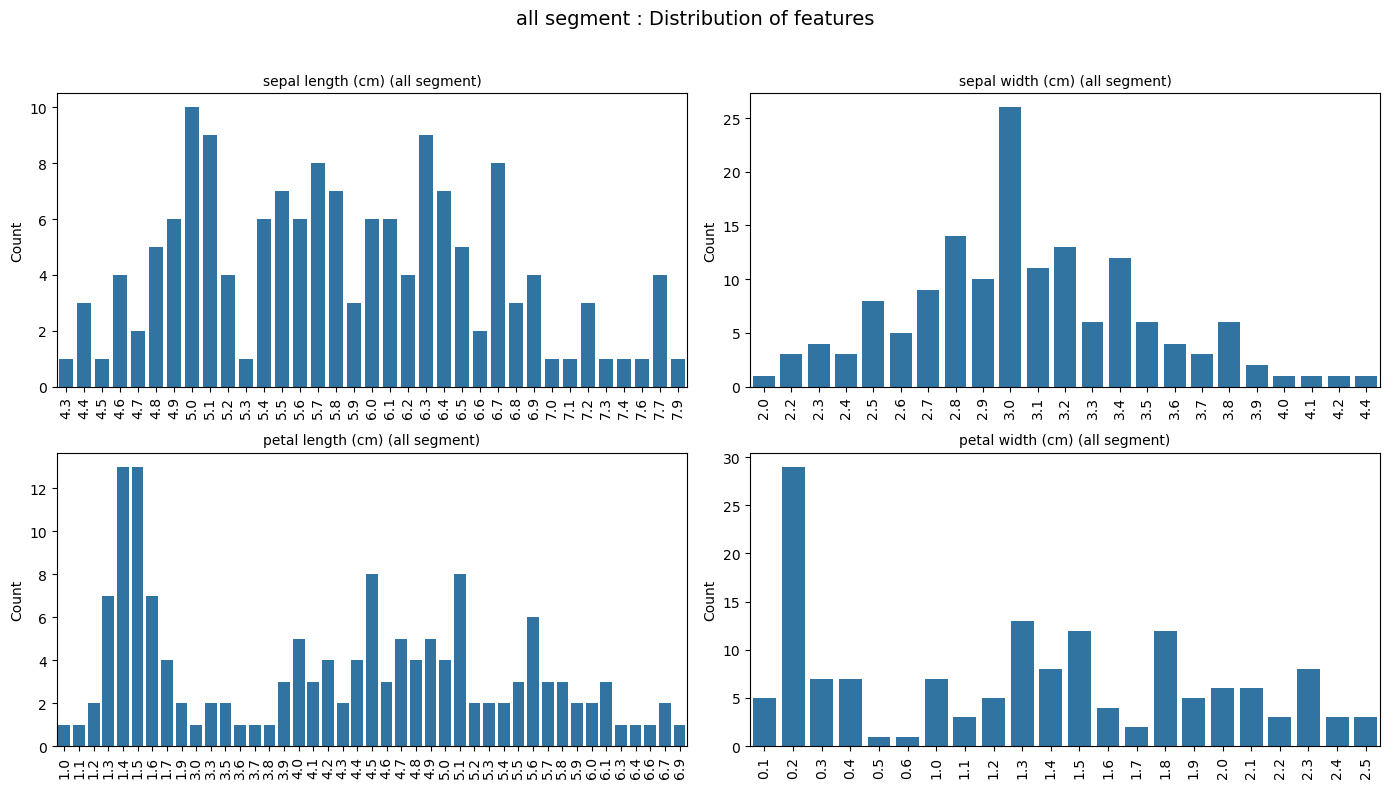

Execution time for plot_feature_distributions: 2.7186 seconds


In [7]:
plot_feature_distributions(
    df_dict=df_dict_all,
    features= df_iris.drop(columns=['id','species','species_name'],axis=1).columns.to_list(),
    primary_key='id',
    # binning_keywords=['BENE','PREMIUM'],  # or None
    n_bins=10
)